<a href="https://colab.research.google.com/github/e-evarela/DataJour/blob/main/NAFTEMPORIKI_ENOIKIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [3]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [4]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [5]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [6]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [7]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [8]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 66.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import spacy

In [10]:
nlp = spacy.load('el_core_news_sm')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_Naftemporikh_enoikia.csv")
# airbnb_df = pd.read_csv(data_csv_url)

In [13]:
airbnb_df

article_url  \
0   https://www.naftemporiki.gr/finance/economy/19...   
1   https://www.naftemporiki.gr/finance/economy/19...   
2   https://www.naftemporiki.gr/finance/1955005/st...   
3   https://www.naftemporiki.gr/finance/economy/19...   
4   https://www.naftemporiki.gr/finance/economy/19...   
5   https://www.naftemporiki.gr/finance/economy/19...   
6   https://www.naftemporiki.gr/politics/1947505/l...   
7   https://www.naftemporiki.gr/finance/economy/19...   
8   https://www.naftemporiki.gr/finance/economy/19...   
9   https://www.naftemporiki.gr/finance/economy/19...   
10  https://www.naftemporiki.gr/society/1884415/rn...   
11  https://www.naftemporiki.gr/society/1847463/kr...   
12  https://www.naftemporiki.gr/kosmos/1845454/not...   
13  https://www.naftemporiki.gr/politics/1790289/t...   
14  https://www.naftemporiki.gr/finance/economy/17...   
15  https://www.naftemporiki.gr/finance/economy/16...   
16  https://www.naftemporiki.gr/politics/1588086/m...   
17  https://www.naftemporiki.gr/finance/economy/15...   
18  https://www.naftemporiki.gr/finance/world/1551...   
19  https://www.naftemporiki.gr/finance/world/1541...   
20  https://www.naftemporiki.gr/finance/economy/15...   
21  https://www.naftemporiki.gr/finance/economy/15...   
22  https://www.naftemporiki.gr/sports/1503562/60-...   
23  https://www.naftemporiki.gr/society/1498720/fo...   
24  https://www.naftemporiki.gr/finance/economy/14...   
25  https://www.naftemporiki.gr/finance/economy/14...   
26  https://www.naftemporiki.gr/kosmos/1483809/pai...   
27  https://www.naftemporiki.gr/finance/world/1462...   
28  https://www.naftemporiki.gr/afieromata/1359679...   
29  https://www.naftemporiki.gr/finance/1349683/en...   
30  https://www.naftemporiki.gr/finance/1323787/ak...   
31  https://www.naftemporiki.gr/deltia-typou/13116...   
32  https://www.naftemporiki.gr/afieromata/1310710...   
33  https://www.naftemporiki.gr/finance/1134352/di...   
34  https://www.naftemporiki.gr/finance/770943/mei...   
35  https://www.naftemporiki.gr/finance/740448/mei...   
36  https://www.naftemporiki.gr/finance/710137/mei...   
37  https://www.naftemporiki.gr/finance/680952/mei...   
38  https://www.naftemporiki.gr/finance/594614/mei...   
39  https://www.naftemporiki.gr/finance/540886/eno...   
40  https://www.naftemporiki.gr/business/523083/st...   

                                                title        date      time  \
0   Πληθωρισμός: Άνοδος στο 2,5% τον Μάιο – Νέα αύ...  2025-06-10  12:22:51   
1   Ενοίκια: Πώς θα «πέσουν» περισσότερες κατοικίε...  2025-05-15  10:42:34   
2   Στεγαστική κρίση: Τα 25.000 ακίνητα στα χαρτοφ...  2025-05-12  06:43:56   
3   Φουντώνει η «φωτιά» σε κατοικίες – ενοίκια: Όλ...  2025-05-11  18:05:16   
4   Ακίνητα: Η ζήτηση υπερβαίνει την προσφορά –  1...  2025-05-02  08:41:55   
5   Ενοίκια: Ποιοι δικαιούνται επιστροφή τον Νοέμβ...  2025-04-23  07:18:22   
6   Κ. Μητσοτάκης: Επιστρέφουμε στους ενοικιαστές ...  2025-04-22  13:00:38   
7   Σχεδόν το 43% δυσκολεύεται να πληρώσει ενοίκιο...  2025-04-16  15:50:59   
8   Παρατηρητήριο GEOAXIS: «Έκρηξη» στα ενοίκια γρ...  2025-04-05  19:12:32   
9   Θ. Μπάκας στη «Ν»: Το 47,3% των συμπολιτών μας...  2025-02-14  16:31:43   
10  RND:  Όταν το ενοίκιο για 54 τ.μ. στην Ελλάδα,...  2025-01-16  18:06:02   
11  Κρήτη: Ένα σπίτι που προκάλεσε «ουρές» – Ποιο ...  2024-12-05  15:33:57   
12  Νότιος Λίβανος: Εκτοπισμένοι για δεύτερη φορά ...  2024-12-03  23:03:16   
13  Τα ενοίκια του Κασσελάκη, τα «πακέτα Μπάιντεν»...  2024-10-09  06:48:00   
14  Πώς θα ανοίξουν κλειστά διαμερίσματα και θα με...  2024-08-24  08:54:16   
15     Ακριβά ενοίκια: Πώς θα βρείτε φθηνότερα σπίτια  2024-02-26  17:00:29   
16  Μητοτάκης στο TikTok: Η σκληρή αλήθεια για τα ...  2024-02-11  21:26:39   
17  Επαγγελματικά ακίνητα: Παρατείνεται για έναν χ...  2024-01-01  19:48:29   
18  Τουρκία: Η κεντρική τραπεζίτης, δεν μπορούσε ν...  2023-12-18  16:22:50   
19  Βρυξέλλες: Αύξηση στα ενοίκια των μόνιμων κατο...  2023-11-27  

In [14]:
airbnb_df = airbnb_df.dropna(subset="date").reset_index(drop=True)
airbnb_df = airbnb_df.dropna(subset="text_body").reset_index(drop=True)
airbnb_df.shape

(41, 10)

In [15]:
airbnb_df.tail(20)

article_url  \
21  https://www.naftemporiki.gr/finance/economy/15...   
22  https://www.naftemporiki.gr/sports/1503562/60-...   
23  https://www.naftemporiki.gr/society/1498720/fo...   
24  https://www.naftemporiki.gr/finance/economy/14...   
25  https://www.naftemporiki.gr/finance/economy/14...   
26  https://www.naftemporiki.gr/kosmos/1483809/pai...   
27  https://www.naftemporiki.gr/finance/world/1462...   
28  https://www.naftemporiki.gr/afieromata/1359679...   
29  https://www.naftemporiki.gr/finance/1349683/en...   
30  https://www.naftemporiki.gr/finance/1323787/ak...   
31  https://www.naftemporiki.gr/deltia-typou/13116...   
32  https://www.naftemporiki.gr/afieromata/1310710...   
33  https://www.naftemporiki.gr/finance/1134352/di...   
34  https://www.naftemporiki.gr/finance/770943/mei...   
35  https://www.naftemporiki.gr/finance/740448/mei...   
36  https://www.naftemporiki.gr/finance/710137/mei...   
37  https://www.naftemporiki.gr/finance/680952/mei...   
38  https://www.naftemporiki.gr/finance/594614/mei...   
39  https://www.naftemporiki.gr/finance/540886/eno...   
40  https://www.naftemporiki.gr/business/523083/st...   

                                                title        date      time  \
21  Ακίνητα: Σε ποιες περιοχές είναι απλησίαστα τα...  2023-09-08  17:16:09   
22  60 χρόνια Bundesliga: Όταν τα λεφτά  δεν έφταν...  2023-08-13  16:38:32   
23  Φοιτητικές κατοικίες: Στα ύψη και φέτος τα ενο...  2023-07-27  14:35:47   
24          Ακίνητα: Τι εκτινάσσει τα ενοίκια στα ύψη  2023-07-11  15:05:36   
25  Spitogatos: Στα ύψη τιμές κατοικιών και ενοίκι...  2023-07-10  11:53:58   
26  Παίρνει αεροπλάνο για να πηγαίνει στη δουλειά ...  2023-06-16  15:15:57   
27  Πανάκριβα τα ενοίκια στο Λονδίνο: Αυξάνονται μ...  2023-04-19  17:59:38   
28        Τελικά, είναι ακριβά τα ενοίκια στην Αθήνα;  2022-08-06  07:52:00   
29  Ενοίκια: Οι ακριβότερες και οι φθηνότερες περι...  2022-07-07  08:40:00   
30  Ακίνητα: Σε υψηλό 10ετίας τα ενοίκια- Οι αγορα...  2022-04-25  12:06:00   
31  Γ. Χατζηθεοδοσίου στη Ναυτεμπορική: Επιβεβλημέ...  2022-03-22  09:33:53   
32          Αναγκαίο το «πάγωμα» αυξήσεων στα ενοίκια  2022-03-19  08:58:00   
33  Δημοψήφισμα: Απαλλοτρίωση 240.000 διαμερισμάτω...  2021-09-27  17:10:00   
34  Μειωμένα ενοίκια: Τη Δευτέρα ανοίγει η πλατφόρ...  2021-07-03  15:58:00   
35  Μειωμένο ενοίκιο κατά 40% και  τον Ιούνιο για ...  2021-06-28  15:42:00   
36  Μειωμένα ενοίκια : «Έρχονται» οι πληρωμές των ...  2021-06-22  07:27:00   
37  Μειωμένα ενοίκια: Τελευταία ημέρα υποβολής των...  2021-06-15  07:24:00   
38  Μειωμένα ενοίκια : Εκταμιεύονται οι αποζημιώσε...  2021-05-28  12:15:00   
39  Ενοίκια Μαΐου: Εν αναμονή της απόφασης με τους...  2021-05-19  07:21:00   
40  Σταϊκούρας: Από τον Ιούνιο το πρόγραμμα πάγιων...  2021-05-15  15:15:00   

                                         section author  \
21  Οικονομία & Αγορές                \Οικονομία    NaN   
22                                      Αθλητικά    NaN   
23                                      Κοινωνία    NaN   
24  Οικονομία & Αγορές                \Οικονομία    NaN   
25  Οικονομία & Αγορές                \Οικονομία    NaN   
26                                        Κόσμος    NaN   
27     Οικονομία & Αγορές                \Διεθνή    NaN   
28      Αφιερώματα                \THE N SOCIETY    NaN   
29  Οικονομία & Αγορές                \Οικονομία    NaN   
30  Οικονομία & Αγορές                \Οικονομία    NaN   
31                                  Δελτία Τύπου    NaN   
32      Αφιερώματα                \THE N SOCIETY    NaN   
33                            Οικονομία & Αγορές    NaN   
34  Οικονομία & Αγορές                \Οικονομία    NaN   
35     Οικονομία & Αγορές                \Αγορές    NaN   
36  Οικονομία & Αγορές                \Οικονομία    NaN   
37  Οικονομία & Αγορές                \Οικονομία    NaN   
38  Οικονομία & Αγορές                \Οικονομία    NaN   
39  Οικονομία & Αγορές                \Οικονομία    NaN   
40  

In [16]:
len(airbnb_df)

41

In [17]:
airbnb_df = airbnb_df.iloc[:-8]

In [18]:
airbnb_df.tail(10)

article_url  \
23  https://www.naftemporiki.gr/society/1498720/fo...   
24  https://www.naftemporiki.gr/finance/economy/14...   
25  https://www.naftemporiki.gr/finance/economy/14...   
26  https://www.naftemporiki.gr/kosmos/1483809/pai...   
27  https://www.naftemporiki.gr/finance/world/1462...   
28  https://www.naftemporiki.gr/afieromata/1359679...   
29  https://www.naftemporiki.gr/finance/1349683/en...   
30  https://www.naftemporiki.gr/finance/1323787/ak...   
31  https://www.naftemporiki.gr/deltia-typou/13116...   
32  https://www.naftemporiki.gr/afieromata/1310710...   

                                                title        date      time  \
23  Φοιτητικές κατοικίες: Στα ύψη και φέτος τα ενο...  2023-07-27  14:35:47   
24          Ακίνητα: Τι εκτινάσσει τα ενοίκια στα ύψη  2023-07-11  15:05:36   
25  Spitogatos: Στα ύψη τιμές κατοικιών και ενοίκι...  2023-07-10  11:53:58   
26  Παίρνει αεροπλάνο για να πηγαίνει στη δουλειά ...  2023-06-16  15:15:57   
27  Πανάκριβα τα ενοίκια στο Λονδίνο: Αυξάνονται μ...  2023-04-19  17:59:38   
28        Τελικά, είναι ακριβά τα ενοίκια στην Αθήνα;  2022-08-06  07:52:00   
29  Ενοίκια: Οι ακριβότερες και οι φθηνότερες περι...  2022-07-07  08:40:00   
30  Ακίνητα: Σε υψηλό 10ετίας τα ενοίκια- Οι αγορα...  2022-04-25  12:06:00   
31  Γ. Χατζηθεοδοσίου στη Ναυτεμπορική: Επιβεβλημέ...  2022-03-22  09:33:53   
32          Αναγκαίο το «πάγωμα» αυξήσεων στα ενοίκια  2022-03-19  08:58:00   

                                         section author  \
23                                      Κοινωνία    NaN   
24  Οικονομία & Αγορές                \Οικονομία    NaN   
25  Οικονομία & Αγορές                \Οικονομία    NaN   
26                                        Κόσμος    NaN   
27     Οικονομία & Αγορές                \Διεθνή    NaN   
28      Αφιερώματα                \THE N SOCIETY    NaN   
29  Οικονομία & Αγορές                \Οικονομία    NaN   
30  Οικονομία & Αγορές                \Οικονομία    NaN   
31                                  Δελτία Τύπου    NaN   
32      Αφιερώματα                \THE N SOCIETY    NaN   

                                              excerpt  \
23  Αθήνα: Στο 10,8€/τ.μ. η μέση ζητούμενη τιμή εν...   
24                                                NaN   
25  Αττική: Αυξήσεις στις μέσες ζητούμενες τιμές π...   
26                                                NaN   
27                                                NaN   
28                                                NaN   
29                               Η εικόνα στην Αττική   
30                                                NaN   
31                                                NaN   
32                                                NaN   

                                            text_body  \
23  Σημαντική αύξηση στα ενοίκια των φοιτητικών κα...   
24  «Η ελληνική κτηματαγορά δεν συμβαδίζει με άλλε...   
25  Τη συνολική εικόνα της τάσης των τιμών της αγο...   
26  Η Sophia Celentano ζει στη Νότια Καρολίνα αλλά...   
27  Τα ενοίκια στο Λονδίνο αυξάνονται με ραγδαίο ρ...   
28  The N Society Του Νάσου Γαβαλά, διευθύνοντος σ...   
29  «Βασίλισσα» στα υψηλά ενοίκια αναδεικνύεται γι...   
30  Οι νέες προκλήσεις στην αγορά ακινήτων, όπως α...   
31  Ο Πρόεδρος του Επαγγελματικού Επιμελητηρίου Αθ...   
32  The N Society Του Γιάννη Χατζηθεοδοσίου, Προέδ...   

                                        feat_img_link  \
23  https://www.naftemporiki.gr/wp-content/themes/...   
24  https://www.naftemporiki.gr/wp-content/themes/...   
25  https://www.naftemporiki.gr/wp-content/themes/...   
26  https://www.naftemporiki.gr/wp-content/themes/...   
27  https://www.naftemporiki.gr/wp-content/themes/...   
28  https://www.naftemporiki.gr/wp-content/themes/...   
29  https://www.naftemporiki.gr/wp-content/themes/...   
30  https://www.naftemporiki.gr/wp-content/themes/...   
31  https://www.naftemporiki.gr/wp-content/themes/...   
32  https://www.naftemporiki.gr/wp-content/themes/...   

          

In [19]:
len(airbnb_df)

33

In [20]:
mask = (
    airbnb_df['text_body'].str.contains(r'airbnb|Airbnb|AIRBNB', na=False) | #είχε φέρει και άρθρα που έλεγαν για Airbus
    airbnb_df['title'].str.contains(r'airbnb|Airbnb|AIRBNB', na=False)
)

filtered_df = airbnb_df[mask]

In [21]:
airbnb_df = filtered_df.reset_index(drop=True)

In [22]:
airbnb_df

article_url  \
0  https://www.naftemporiki.gr/finance/economy/19...   
1  https://www.naftemporiki.gr/finance/economy/19...   
2  https://www.naftemporiki.gr/society/1884415/rn...   
3  https://www.naftemporiki.gr/finance/world/1541...   

                                               title        date      time  \
0  Φουντώνει η «φωτιά» σε κατοικίες – ενοίκια: Όλ...  2025-05-11  18:05:16   
1  Παρατηρητήριο GEOAXIS: «Έκρηξη» στα ενοίκια γρ...  2025-04-05  19:12:32   
2  RND:  Όταν το ενοίκιο για 54 τ.μ. στην Ελλάδα,...  2025-01-16  18:06:02   
3  Βρυξέλλες: Αύξηση στα ενοίκια των μόνιμων κατο...  2023-11-27  20:19:06   

                                        section  \
0  Οικονομία & Αγορές                \Οικονομία   
1  Οικονομία & Αγορές                \Οικονομία   
2                                      Κοινωνία   
3     Οικονομία & Αγορές                \Διεθνή   

                                              author  \
0  Από την έντυπη έκδοση\nΤέτη Ηγουμενίδη        ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                             excerpt  \
0  Με υψηλό ρυθμό συνεχίζει να αυξάνεται το κόστο...   
1  Η πορεία των μισθωμάτων (Market Rents) παλαιών...   
2  «Όταν η Εύη Αγγελοπούλου νοίκιαζε το διαμέρισμ...   
3                                                NaN   

                                           text_body  \
0  Σύμφωνα με στοιχεία που δημοσιοποίησε την Παρα...   
1  Ειδικότερα σύμφωνα με το GEOAXIS «Παρατηρητήρι...   
2  Αυτή είναι η πραγματικότητα που αντιμετωπίζουν...   
3  Έρευνα του Ελεύθερου Πανεπιστημίου Βρυξελλών, ...   

                                       feat_img_link  \
0  https://www.naftemporiki.gr/wp-content/themes/...   
1  https://www.naftemporiki.gr/wp-content/themes/...   
2  https://www.naftemporiki.gr/wp-content/themes/...   
3  https://www.naftemporiki.gr/wp-content/themes/...   

                                     feat_img_cation  
0  Τι καταδεικνύουν τα νέα στοιχεία της ΕΛΣΤΑΤ γι...  
1  Σήμερα, η αγορά γραφείων χαρακτηρίζεται από τρ...  
2  Ο γερμανικός Τύπος γράφει για τη στεγαστική κρ...  
3  Iδιαίτερα ανησυχητικά για τις αρχές των Βρυξελ...

In [23]:
airbnb_df.to_csv("/content/drive/MyDrive/DataJour/CORRECTEDArticles_Naftemporiki_Enoikia.csv", index=False)

In [24]:
short_airbnb_df = airbnb_df[['date', 'text_body']].rename(columns={'text_body': 'text'})

In [25]:
short_airbnb_df.tail()

date                                               text
0  2025-05-11  Σύμφωνα με στοιχεία που δημοσιοποίησε την Παρα...
1  2025-04-05  Ειδικότερα σύμφωνα με το GEOAXIS «Παρατηρητήρι...
2  2025-01-16  Αυτή είναι η πραγματικότητα που αντιμετωπίζουν...
3  2023-11-27  Έρευνα του Ελεύθερου Πανεπιστημίου Βρυξελλών, ...

In [26]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [27]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [28]:
matrix = vec.fit_transform(short_airbnb_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  

[4 rows x 13161 columns]

In [29]:
wordcount_df.shape

(4, 13161)

In [30]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [31]:
wordcount_df[trust_words].sum(axis=1).head(3)

0    15
1     8
2     5
dtype: int64

In [32]:
short_airbnb_df.head(3)

date                                               text
0  2025-05-11  Σύμφωνα με στοιχεία που δημοσιοποίησε την Παρα...
1  2025-04-05  Ειδικότερα σύμφωνα με το GEOAXIS «Παρατηρητήρι...
2  2025-01-16  Αυτή είναι η πραγματικότητα που αντιμετωπίζουν...

In [33]:
short_airbnb_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_airbnb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_airbnb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_airbnb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_airbnb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_airbnb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_airbnb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_airbnb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_airbnb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_airbnb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [34]:
short_airbnb_df

date                                               text  anger  \
0  2025-05-11  Σύμφωνα με στοιχεία που δημοσιοποίησε την Παρα...      5   
1  2025-04-05  Ειδικότερα σύμφωνα με το GEOAXIS «Παρατηρητήρι...      5   
2  2025-01-16  Αυτή είναι η πραγματικότητα που αντιμετωπίζουν...      1   
3  2023-11-27  Έρευνα του Ελεύθερου Πανεπιστημίου Βρυξελλών, ...      3   

   positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0        14    3        4         1     15             2        5        13   
1        15    1        1         0      8             2        2         6   
2         8    2        4         1      5             2        3         8   
3        10    3        2         2     11             3        4        10   

   fear  
0     6  
1     2  
2     5  
3     2

In [35]:
len(short_airbnb_df)

4

In [36]:
short_airbnb_df = short_airbnb_df.set_index('date')  # Set 'date' as index
short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index)  # Convert index to datetime

# Now resample
resampled = short_airbnb_df[['positive', 'negative', 'anger', 'joy', 'sadness']].resample('D').mean().fillna(0)

/tmp/ipython-input-37-3946525130.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].str.len().resample('3M').mean().plot()


<Axes: xlabel='date'>

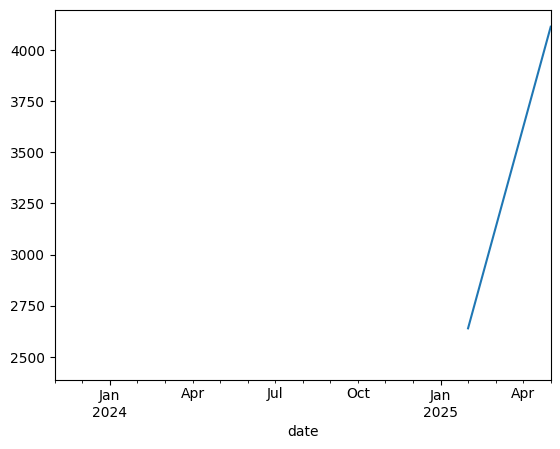

In [37]:
short_airbnb_df['text'].str.len().resample('3M').mean().plot()

/tmp/ipython-input-38-1820397299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')


<Axes: ylabel='date'>

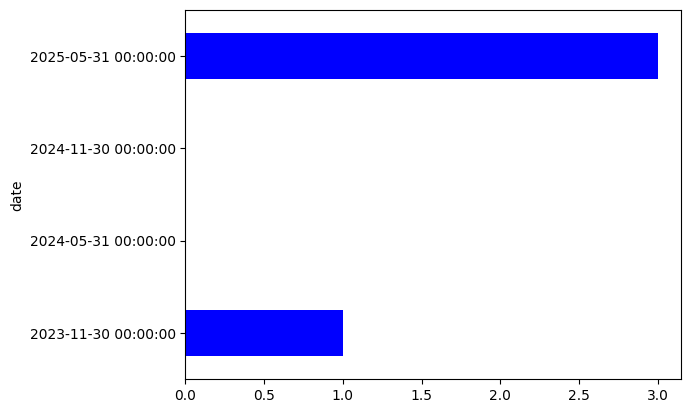

In [38]:
short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')

In [39]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [40]:
#plt.style.use('classic')
plt.style.use('ggplot')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

/tmp/ipython-input-41-175908563.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
/tmp/ipython-input-41-175908563.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-41-175908563.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-41-175908563.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-41-175908563.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inst

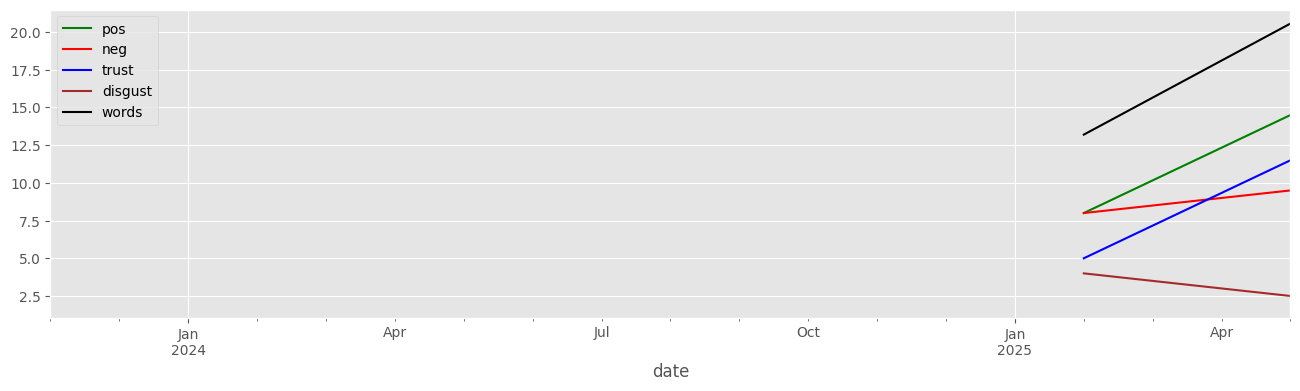

In [41]:
ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_airbnb_df['text'].str.len().resample('3M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [42]:
# daily_df = short_airbnb_df.resample('3M').mean().fillna(0)

/tmp/ipython-input-43-75750340.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))


<Axes: xlabel='date'>

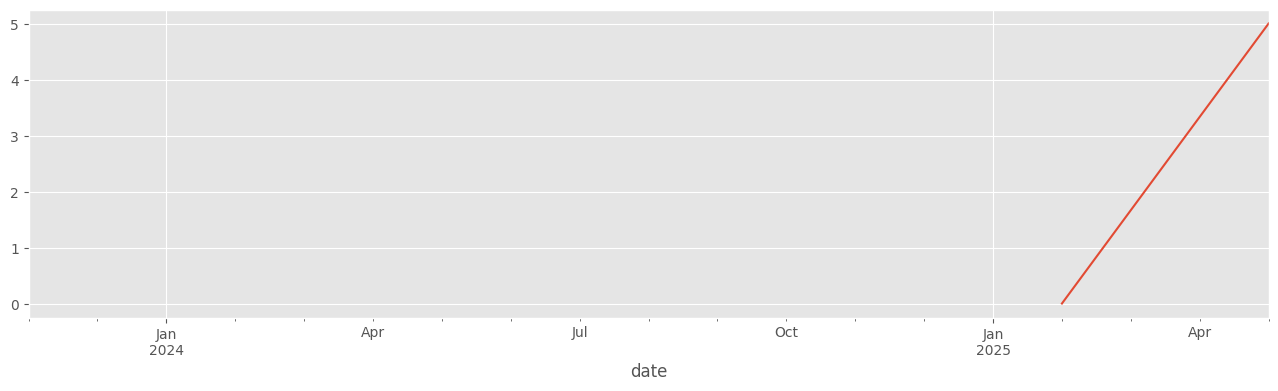

In [43]:
short_airbnb_df['pos/neg'] = short_airbnb_df['positive'] - short_airbnb_df['negative']
short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))

In [44]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-45-2136036587.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
/tmp/ipython-input-45-2136036587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0


<Axes: xlabel='date'>

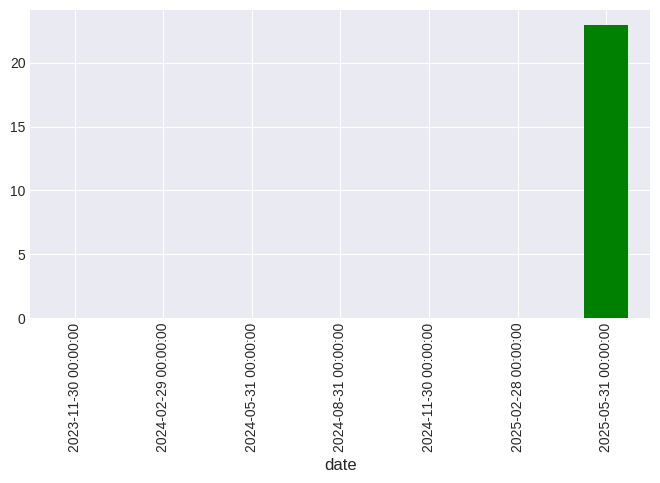

In [45]:
short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_airbnb_df.positive*100//short_airbnb_df[['positive','negative']].sum(
        axis=1) - short_airbnb_df.negative*100//short_airbnb_df[['positive','negative']].sum(axis=1)

short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
                                                                               color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

/tmp/ipython-input-46-2877103554.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col: short_airbnb_df[col].resample('3M').mean()


<Axes: xlabel='date'>

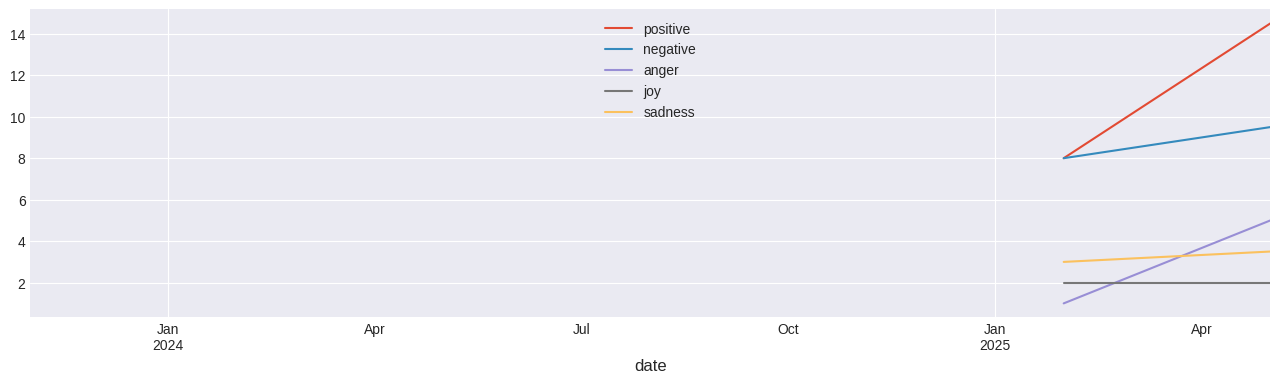

In [46]:
# List of emotion columns
emotion_cols = ['positive', 'negative', 'anger', 'joy', 'sadness']  # add your columns here

# Resample each and combine
resampled = pd.DataFrame({
    col: short_airbnb_df[col].resample('3M').mean()
    for col in emotion_cols
})

# Plot all lines on one figure
resampled.plot(figsize=(16,4), kind='line')

In [47]:
short_airbnb_df[
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].min())
][['positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

positive  negative  (-)αρνητικότητα | θετικότητα(+)
date                                                           
2025-04-05        15         6                               43
2025-01-16         8         8                                0
2023-11-27        10        10                                0

In [48]:
text = airbnb_df['text_body'].str.cat(sep = ' ')

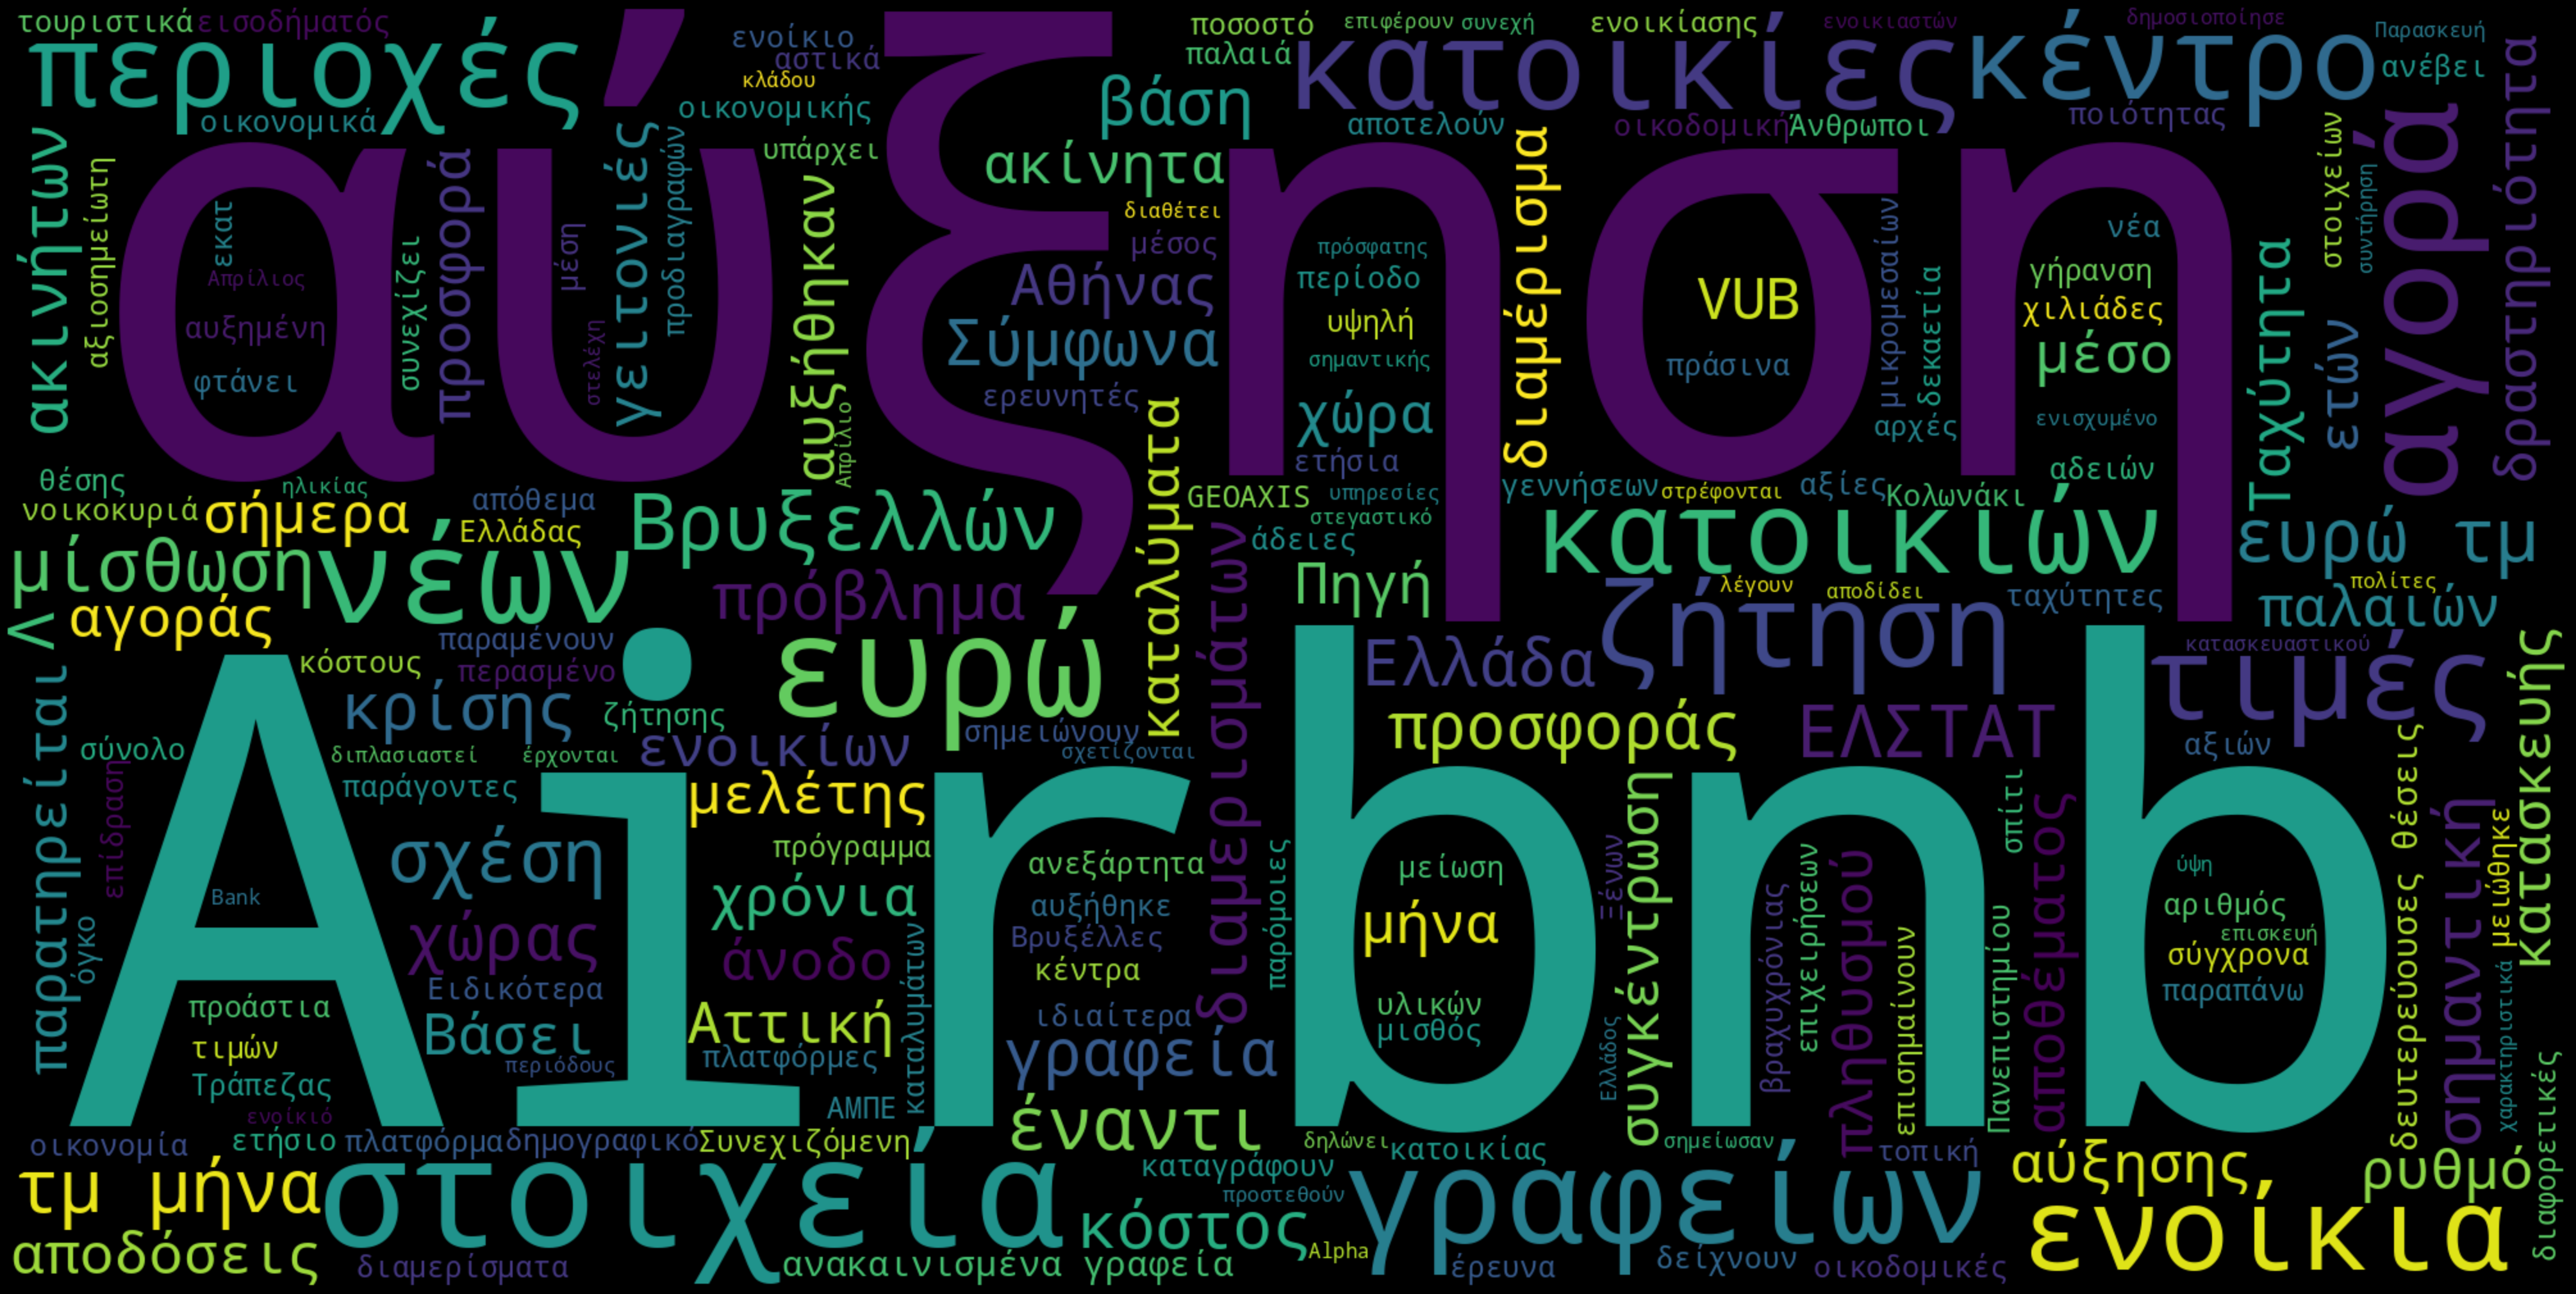

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud1 = WordCloud()
extra_stopwords = {'ή'}
all_stopwords = nlp.Defaults.stop_words.union(extra_stopwords)

wordcloud1 = WordCloud(
    stopwords=all_stopwords,
    width=2000,
    height=1000,
    background_color='black'
).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [54]:
mask = short_airbnb_df['text'].str.contains(r'Airbnb|airbnb|AIRBNB', na=False)
print(short_airbnb_df[mask])

                                                         text  anger  \
date                                                                   
2025-05-11  Σύμφωνα με στοιχεία που δημοσιοποίησε την Παρα...      5   
2025-04-05  Ειδικότερα σύμφωνα με το GEOAXIS «Παρατηρητήρι...      5   
2025-01-16  Αυτή είναι η πραγματικότητα που αντιμετωπίζουν...      1   
2023-11-27  Έρευνα του Ελεύθερου Πανεπιστημίου Βρυξελλών, ...      3   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-05-11        14    3        4         1     15             2        5   
2025-04-05        15    1        1         0      8             2        2   
2025-01-16         8    2        4         1      5             2        3   
2023-11-27        10    3        2         2     11             3        4   

            negative  fear  pos/neg  (-)αρνητικότητα | θετικότητα(+)  
date                       

In [55]:
filtered_df = short_airbnb_df[mask]
filtered_df

text  anger  \
date                                                                   
2025-05-11  Σύμφωνα με στοιχεία που δημοσιοποίησε την Παρα...      5   
2025-04-05  Ειδικότερα σύμφωνα με το GEOAXIS «Παρατηρητήρι...      5   
2025-01-16  Αυτή είναι η πραγματικότητα που αντιμετωπίζουν...      1   
2023-11-27  Έρευνα του Ελεύθερου Πανεπιστημίου Βρυξελλών, ...      3   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-05-11        14    3        4         1     15             2        5   
2025-04-05        15    1        1         0      8             2        2   
2025-01-16         8    2        4         1      5             2        3   
2023-11-27        10    3        2         2     11             3        4   

            negative  fear  pos/neg  (-)αρνητικότητα | θετικότητα(+)  
date                                                                  
2025-05-11        13     6        1                                3  
2025-04-05         6     2        9                               43  
2025-01-16         8     5        0                                0  
2023-11-27        10     2        0                                0

In [56]:
len(filtered_df)

4

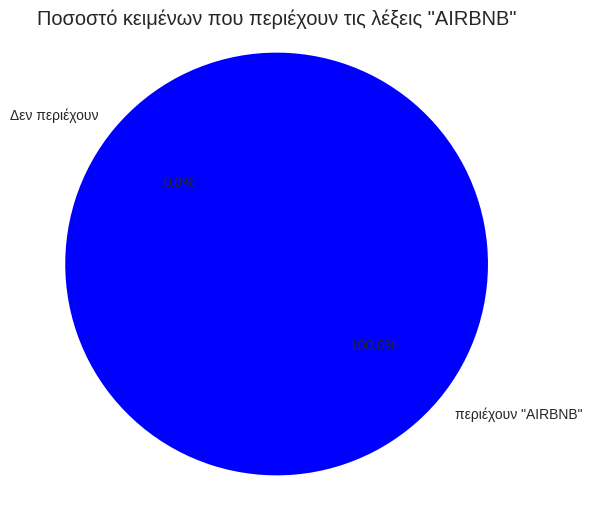

In [57]:
import matplotlib.pyplot as plt

# Δημιουργία μάσκας
mask = short_airbnb_df['text'].str.contains(r'Airbnb|airbnb|AIRBNB', case=False, na=False)

# Υπολογισμός αριθμών
matching = mask.sum()                   # Πόσες γραμμές καλύπτει η μάσκα (True)
not_matching = len(mask) - matching     # Όσες δεν την καλύπτουν

# Δεδομένα για το pie chart
labels = ['περιέχουν "AIRBNB"', 'Δεν περιέχουν']
sizes = [matching, not_matching]
colors = ['blue', 'gray']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ποσοστό κειμένων που περιέχουν τις λέξεις "AIRBNB"')
plt.axis('equal')  # κάνει τον κύκλο "στρογγυλό"
plt.show()